<a href="https://colab.research.google.com/github/CateMerfeld/class_work/blob/main/pset_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
images = np.load('/content/drive/MyDrive/psets_em/PS10_dataset1.npy')

In [ ]:
flat = images.reshape(-1, 22801)

(2000, 22801)

In [ ]:
pca = PCA(n_components=41)
# pca_components = pca.fit_transform(flat)
# exp_var = pca.explained_variance_ratio_
# plt.plot(np.cumsum(exp_var))
# plt.axhline(.9, color='r')
# plt.show()

In [ ]:
exp_var

array([0.21093584, 0.15827387, 0.08368137, 0.06269131, 0.04743855,
       0.04407309, 0.03505065, 0.02477534, 0.02255295, 0.01869705,
       0.01662362, 0.01403542, 0.0131739 , 0.01189399, 0.01150112,
       0.00991087, 0.00911742, 0.00868462, 0.00785161, 0.00721075,
       0.00639327, 0.00592417, 0.00513043, 0.00501532, 0.00479116,
       0.00452561, 0.00437403, 0.00415361, 0.0039934 , 0.00385237,
       0.00362213, 0.00333015, 0.00326602, 0.00318197, 0.00311462,
       0.00286073, 0.0027291 , 0.00263995, 0.00255575, 0.00247508,
       0.00237433, 0.00222834, 0.0020322 , 0.00198109, 0.00192613,
       0.00181634, 0.00178743, 0.00175876, 0.00173478, 0.00165545,
       0.00156473, 0.00152661, 0.00150547, 0.00146555, 0.00142688,
       0.00139947, 0.00133751, 0.0012762 , 0.00125864, 0.0011867 ,
       0.00116868, 0.0011397 , 0.00113179, 0.00108503, 0.00100949,
       0.0009874 , 0.00098147, 0.0009541 , 0.00095099, 0.00090105])

In [ ]:
cum_exp_var = np.cumsum(exp_var)
above90 = np.argmax(cum_exp_var>.9)

In [ ]:
flat.shape

(2000, 22801)

In [ ]:
pca.fit_transform(flat).shape

In [ ]:
def plot_images(x):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.cm.binary)
    plt.show()

In [ ]:
inversed = pca.inverse_transform(pca.fit_transform(flat)).reshape(-1,151,151)

In [ ]:
# thing = pca.fit_transform(flat)
thing.shape

(2000, 41)

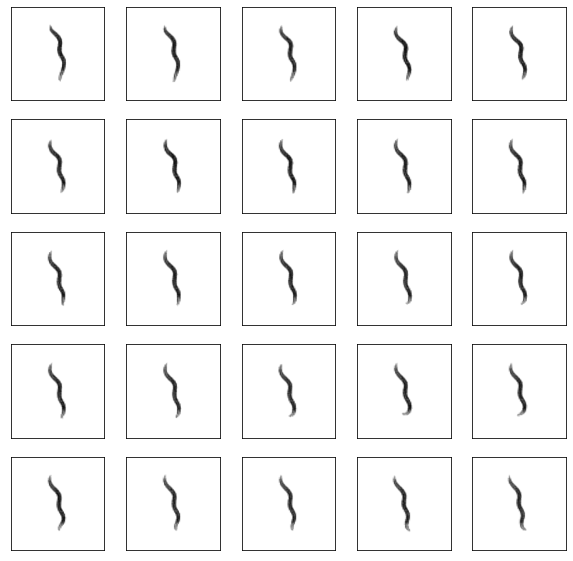

In [ ]:
plot_images(images)

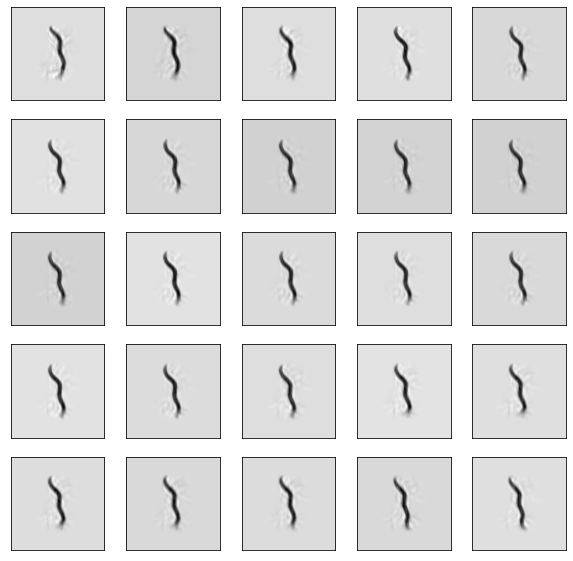

In [ ]:
plot_images(inversed)

In [ ]:
images2 = np.load('/content/drive/MyDrive/psets_em/PS10_dataset2.npy')

In [ ]:
flat2 = images2.reshape(-1, 22801)

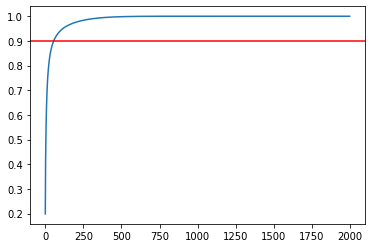

In [ ]:
pca = PCA()
pca_components = pca.fit_transform(flat2)
exp_var = pca.explained_variance_ratio_
plt.plot(np.cumsum(exp_var))
plt.axhline(.9, color='r')
plt.show()

In [ ]:
cum_exp_var = np.cumsum(exp_var)
above90 = np.argmax(cum_exp_var>.9)
comps = int(above90) +1
pca = PCA(n_components=comps)
inversed = pca.inverse_transform(pca.fit_transform(flat2)).reshape(-1,151,151)

In [ ]:
comps

57

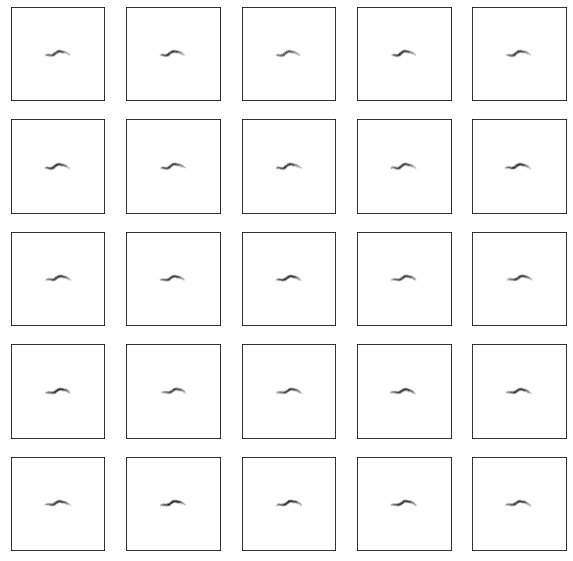

In [ ]:
plot_images(images2)

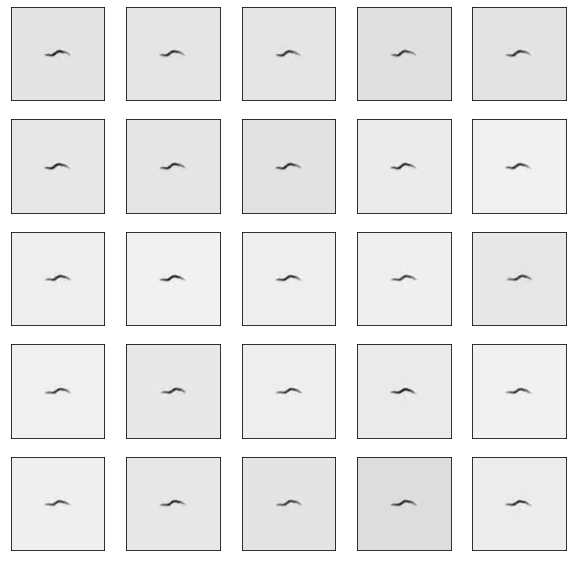

In [ ]:
plot_images(inversed)

In [ ]:
def center_from_theta(theta, orientation = 0, xy = [0,0], length = 120, with_normals = False):
  """Constructs center line from theta on discrete mesh.
  
  Arguments
  ---------
    theta (nx2 array): angles along center line
    orientation (float): absolute orientation of the center line
    xy (2 array): absolute position of the center line
    length (float): length of center line

  Returns
    npointsx2 array: the sample points along the center line
  
  Note:
    The theta sample length is 2 less than the curve sample length.
    The absolute angle is integral of theta so that for discrete integration 
    we multiply this curve with the discretized smaple length of 1/
  """

  nt = theta.shape[0];
  nsamples = nt + 2;
  n2 = (nsamples-1)//2;
  #n2a= (nsamples-2)//2;
  
  #cos/sin
  delta = 1.0 / (nsamples-1); # Delta s for discrete integration nsample points -> nsample-1 segments
  itheta = np.cumsum(np.hstack([0, theta])) * delta;
  #itheta += orientation - (itheta[n2]+itheta[n2a])/2.0;
  itheta += orientation - itheta[n2];
  cos = np.cos(itheta);
  sin = np.sin(itheta);
  
  x = np.cumsum(cos);
  y = np.cumsum(sin);
  center = np.vstack([x,y]).T;
  center = np.vstack([[0,0], center]);
  center = float(length) * delta * center;
  #center += xy - (center[n2] + center[n2a+1])/2.0;
  center += xy - center[n2];
  
  if with_normals:
    dtheta = np.diff(itheta);
    itheta += np.pi/2;
    itheta = np.hstack([itheta, itheta[-1]]);
    itheta[1:-1] -= dtheta / 2;
    return center, np.vstack([np.cos(itheta), np.sin(itheta)]).T;
  else:
    return center;
  
def worm_shape(theta, length = 120):
  """Create center, left and right lines of the worm.
  """
  center, normals = center_from_theta(theta, length=length, with_normals=True)
  w = default_width(len(center))
  w = np.vstack([w,w]).T;
  left  = center + 0.5 * w * normals;
  right = center - 0.5 * w * normals;
  return center, left, right

def plot_worm(theta, length = 120, ax = None, color = 'darkblue'):
  """ Plot a worm shape according to the theta angles. 
  """
  center,left,right = worm_shape(theta, length=length);
  if ax is None:
    ax = plt.gca();
  if color is not None:
    ccolor = color; lcolor = color; rcolor = color;
  ax.plot(left[:,0], left[:,1], lcolor);
  ax.scatter(left[:,0], left[:,1], c = lcolor);
  ax.plot(right[:,0], right[:,1], rcolor);
  ax.scatter(right[:,0], right[:,1], c = rcolor);
  ax.plot(center[:,0], center[:,1], ccolor);
  ax.scatter(center[:,0], center[:,1], c = ccolor);
  ax.set_xlim(-75,75);
  ax.set_ylim(-75,75);

In [ ]:
angles = np.load('/content/drive/MyDrive/psets_em/PS10_dataset3.npy')

In [ ]:
plot_worm(angles[0,:])

NameError: ignored